In [2]:
library(dplyr)
library(igraph) 
library(network) 
library(ggraph)
library(visNetwork)
library(threejs)
library(networkD3)
library(rgl)

In [3]:
setwd("D://LA//ATI Data//Summaries//Just_Auth")

In [4]:
df<- read.table(file="LA.txt", header=T, sep=",")
df<- df[,-1]

In [5]:
head(df)
dim(df)
str(df)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
User035855,Comp808475,Comp081330,TGS,0,17
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
User762066,Comp306129,ActiveDirectory,TGS,0,22
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
User043263,Comp883307,Comp384394,TGS,0,2
User631552,Comp621781,Comp915658,NetworkLogon,0,1


[1] 15953681        6

'data.frame':	15953681 obs. of  6 variables:
 $ UserName  : Factor w/ 28815 levels "ActiveDirectory$",..: 14620 9072 25183 19773 14720 23274 24008 18253 20734 26445 ...
 $ SrcDevice : Factor w/ 18199 levels "ActiveDirectory",..: 14570 11742 5501 1692 15973 11133 16507 16592 9631 1739 ...
 $ DstDevice : Factor w/ 14000 levels "ActiveDirectory",..: 1145 1 1 13999 5317 12798 9069 12802 1 1 ...
 $ AuthType  : Factor w/ 13 levels "Batch","CachedInteractive",..: 10 5 10 5 10 5 5 10 11 11 ...
 $ Failure   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DailyCount: int  17 350 22 35 2 1 14 78 2 4 ...


In [6]:
df %>% mutate(across(where(is.factor), as.character)) -> df

In [7]:
UN <- read.table(file="UserNames.txt", header=F)
UN <- as.vector(UN[,1])

In [8]:
head(UN)
class(UN)
length(UN)

[1] "User024511" "User063197" "User203147" "User365588" "User409683"
[6] "User538831"

[1] "character"

[1] 99

In [9]:
Mal <- df[df$UserName%in%UN, ]

In [10]:
head(Mal)
dim(Mal)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
129,AppService,EnterpriseAppServer,Comp947445,TGS,0,2
468,User871458,Comp273168,Comp273168,TGS,0,6
584,User882755,Comp599337,ActiveDirectory,TGS,0,51
764,User718825,Comp544870,Comp370444,NetworkLogon,0,25
903,User538831,Comp277798,None,WorkstationLock,0,1
1018,AppService,Comp894088,Comp698972,NetworkLogon,0,110063


[1] 151819      6

[1] "There are 95 unique usernames."

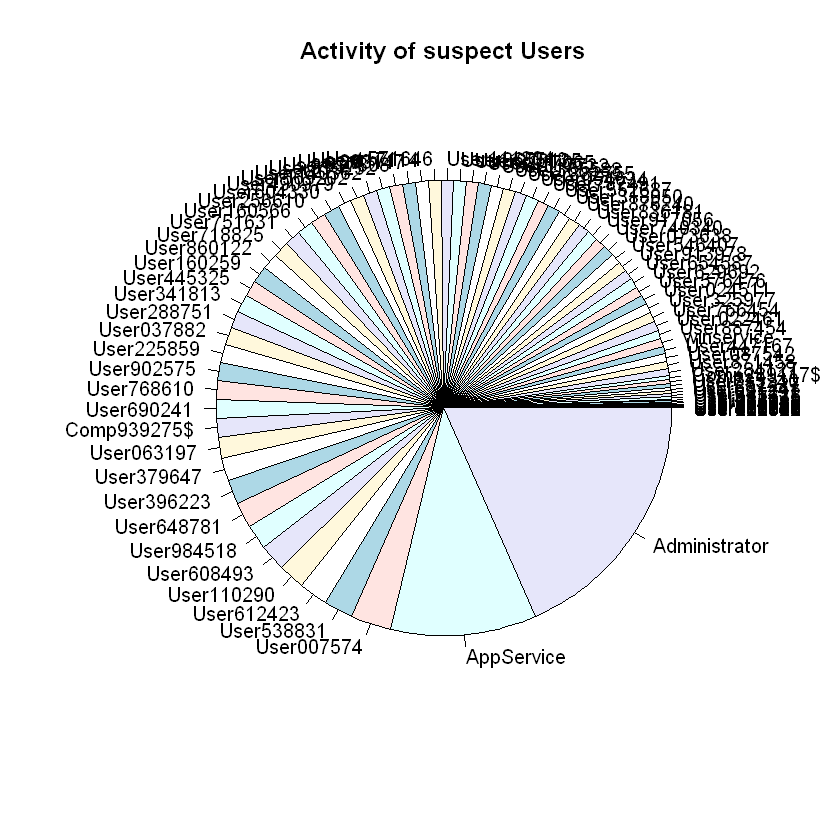

In [56]:
pie(table(Mal$UserName)[order(table(Mal$UserName), decreasing=F)], main="Activity of suspect Users")
paste0("There are ", length(unique(Mal$UserName)), " unique usernames.")

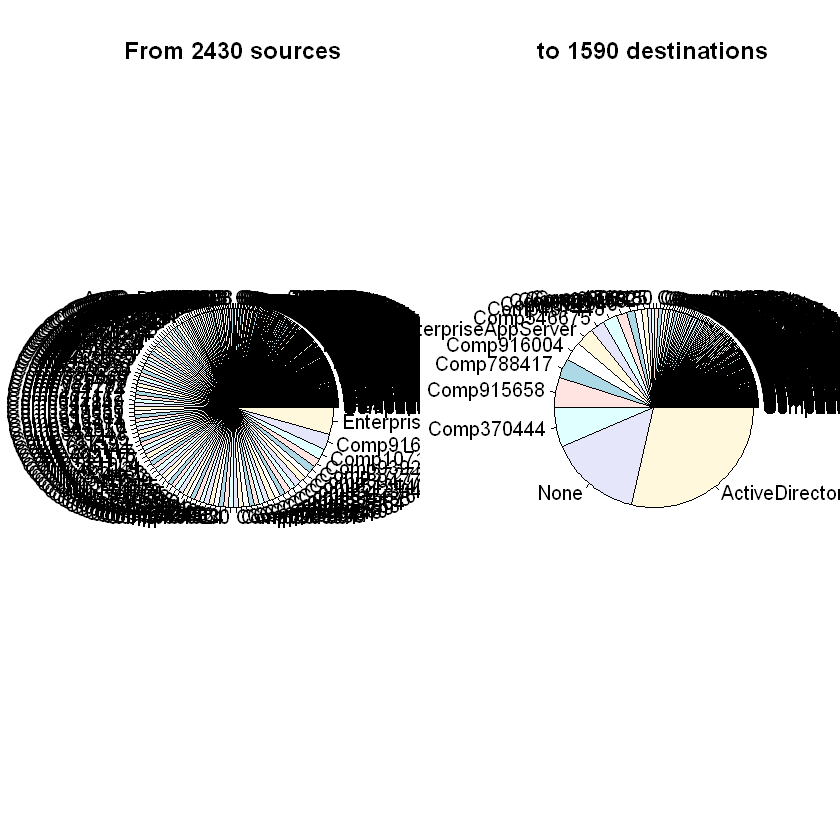

In [38]:
op <- par(mfrow=c(1,2))
pie(table(Mal$SrcDevice)[order(table(Mal$SrcDevice), decreasing=FALSE)], main=paste("From", length(unique(Mal$SrcDevice)), "sources", sep=" "))
pie(table(Mal$DstDevice)[order(table(Mal$DstDevice), decreasing=FALSE)], main=paste("to", length(unique(Mal$DstDevice)), "destinations", sep=" "))
par(op)

In [10]:
PartMean <- function(x=df$UserName) {
    
    n <- readline(prompt="Would you like to run the threshold algorithm T, or the automated version A? Input T or A: ")
    if(n=='T') {
        n<- readline(prompt="Input threshold. We recommend a value around 800, though 500 - 1000 is a sensible range:")
        n<- as.numeric(n)
        i<- 1
        t<- table(x)
        T<- length(t)/n
        len<- vector()
        med <- vector()
        while(length(t)>T) {
            len[i]<- length(t)
            m<- mean(t)
            med[i] <- m
            i<- 1+i
            t<- t[t>m]
            }

        len <- c(len, 0)
        med <- round(med)
        print("The partition lengths are:")
        print(len)
        print("The partitions have corresponding means:")
        print(med)
        print(t[order(t, decreasing=TRUE)])
    
        if(length(t)<=2 & length(t)>=1) {
            print("Potential outlier detected.")
            }
        }
    if(n=='A') { 
        t<- table(x)
        c<- 1
        while(length(t)>=2) {
        m<- mean(t)
        f<- t[t>m]
        f<- f[order(f, decreasing=FALSE)]
        t<- f
        print(paste0("Partition ", c))
        cat('\n')
        c<- 1+c
        if(length(f)>=7) {
            p<- paste(names(f[1]), names(f[2]), names(f[3]), names(f[4]), names(f[5]) , sep=" ")
            # print(p)
            print(paste(p, "and", (length(f)-5), "others", sep=" "))  
            cat("\n")      }
        if(length(f)<7)
          { print(f) 
              cat("\n")    }
            }
    
    
        }
    if(n!='A' & n!='T') {
        print("Unrecognized input.")
        stop()
        }
    }

In [11]:
PartMean()

Would you like to run the threshold algorithm T, or the automated version A? Input T or A: A
[1] "Partition 1"

[1] "Comp039053$ Comp044095$ Comp053112$ Comp076777$ Comp078004$ and 10373 others"

[1] "Partition 2"

[1] "User545165 User963380 Comp352050$ User141270 User142464 and 3738 others"

[1] "Partition 3"

[1] "User738085 User884998 User979892 User047514 User140862 and 755 others"

[1] "Partition 4"

[1] "User449100 User619750 User181140 User765669 User624654 and 64 others"

[1] "Partition 5"

x
   User272607    AppService Administrator       Scanner     Anonymous 
        15767         15791         27928        189928        472595 

[1] "Partition 6"

x
  Scanner Anonymous 
   189928    472595 

[1] "Partition 7"

Anonymous 
   472595 



In [10]:
n<- vector()
for(i in 1:90) {
    df1 <- read.table(file=paste0("A", i, ".txt"), header=F, sep=",")
    n[i] <- nrow(df1)
}

In [11]:
length(n)
identical(mean(n), nrow(df)/90)  ## Should be TRUE

[1] 90

[1] TRUE

In [12]:
n_small <- n * 10^-4

*Yellow represents normal days
**Red represents busy days
***Green represents quiet days

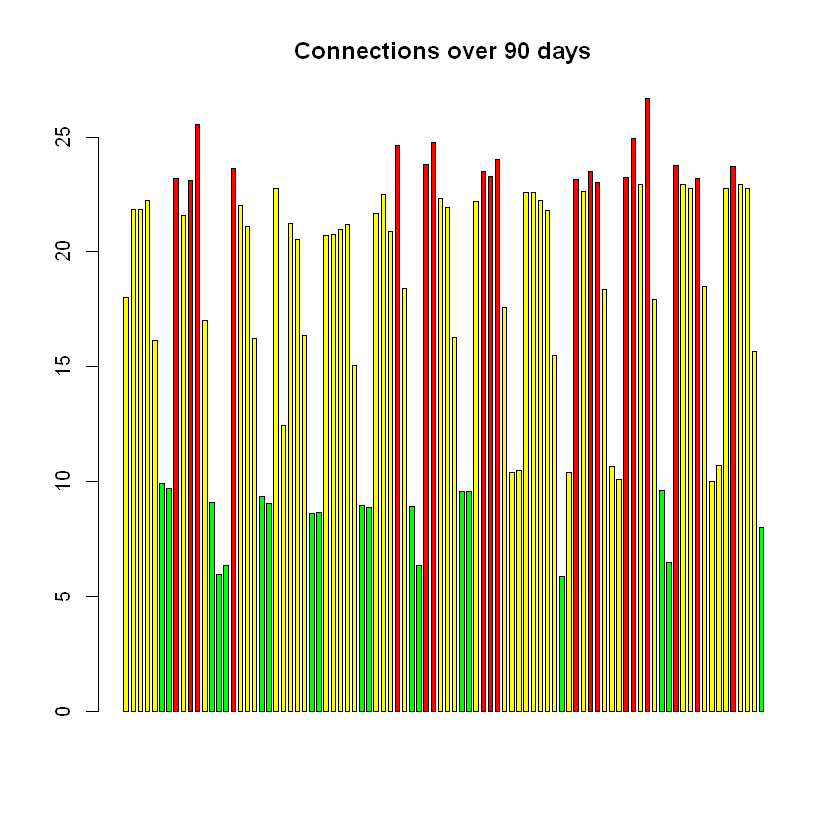

In [55]:
barplot(n_small, col=ifelse(n_small>=23, 'red', ifelse(10<n_small& n_small<23, 'yellow', 'green')), main="Connections over 90 days",
sub=cat("*Yellow represents normal days\n**Red represents busy days\n***Green represents quiet days"), space=0.6)

In [13]:
length(n[n>=23*10^4])
length(n[n<=10*10^4])

[1] 19

[1] 19

In [14]:
dat<- data.frame()
for(i in 1:90) {
    df1 <- read.table(file=paste0("A", i, ".txt"), header=F, sep=",")
    if(nrow(df1)>=23*10^4)   { dat<- rbind(dat, df1) }
    }

In [15]:
colnames(dat) <- c("UserName", "SrcDevice", "DstDevice", "AuthType", "Failure", "DailyCount")

In [16]:
# write.table(x=dat, file="BusyDayCon.txt")
        ## A dataframe consisting of the 19 busiest Auth days

In [17]:
MalDat <- dat[dat$UserName%in%UN, ]

In [18]:
head(MalDat)
dim(MalDat)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
25,User612423,Comp655958,ActiveDirectory,NetworkLogon,0,16
516,AppService,Comp843020,Comp894088,NetworkLogon,0,9
571,User341813,Comp948451,Comp915658,NetworkLogon,0,3
645,User871458,Comp273168,Comp273168,TGS,0,11
1024,User718825,Comp544870,Comp370444,NetworkLogon,0,10
1285,User160259,Comp186020,ActiveDirectory,TGT,0,2


[1] 42400     6

In [19]:
print(paste("In the", length(n[n>=23*10^4]), "busiest days we can find", nrow(MalDat), "of the total", nrow(Mal), "potentially compromised users connections."))
cat("\n")
print(paste0("This amounts to ", nrow(MalDat)/nrow(Mal)*100, "% of the potentially compromised User activity." ))
cat("\n")
print(paste0("The number is selected out of ", nrow(dat)/nrow(df)*100, "% of the entire Auths dataset activity."))

[1] "In the 19 busiest days we can find 42400 of the total 151819 potentially compromised users connections."

[1] "This amounts to 27.9279932024318% of the potentially compromised User activity."

[1] "The number is selected out of 28.5048196713975% of the entire Auths dataset activity."


In [19]:
dat_quiet<- data.frame()
for(i in 1:90) {
    df1 <- read.table(file=paste0("A", i, ".txt"), header=F, sep=",")
    if(nrow(df1)<=10*10^4)   { dat_quiet<- rbind(dat_quiet, df1) }
    }

In [20]:
colnames(dat_quiet) <- c("UserName", "SrcDevice", "DstDevice", "AuthType", "Failure", "DailyCount")

In [21]:
MalDat_quiet <- dat_quiet[dat_quiet$UserName%in%UN, ]

In [22]:
head(MalDat_quiet)
dim(MalDat_quiet)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
380,User608493,EnterpriseAppServer,None,InteractiveLogon,0,8
382,Comp939275$,Comp939275,Comp955279,TGS,0,10
411,User538831,Comp904350,Comp507769,TGS,0,1
437,AppService,Comp843020,Comp894088,NetworkLogon,0,19
480,User341813,Comp948451,Comp915658,NetworkLogon,0,1
705,User379647,Comp083768,ActiveDirectory,NetworkLogon,0,239


[1] 15583     6

In [24]:
print(paste("In the", length(n[n<=10*10^4]), "quietest days we can find", nrow(MalDat_quiet), "of the total", nrow(Mal), "potentially compromised users connections."))
cat("\n")
print(paste0("This amounts to ", nrow(MalDat_quiet)/nrow(Mal)*100, "% of the potentially compromised User activity." ))
cat("\n")
print(paste0("The number is selected out of ", nrow(dat_quiet)/nrow(df)*100, "% of the entire Auths dataset activity."))

[1] "In the 19 quietest days we can find 15583 of the total 151819 potentially compromised users connections."

[1] "This amounts to 10.2641961809787% of the potentially compromised User activity."

[1] "The number is selected out of 9.96423333273368% of the entire Auths dataset activity."


In [11]:
Con <- cbind(Source=Mal$SrcDevice, Dest=Mal$DstDevice)

In [12]:
head(Con)

Source,Dest
EnterpriseAppServer,Comp947445
Comp273168,Comp273168
Comp599337,ActiveDirectory
Comp544870,Comp370444
Comp277798,None
Comp894088,Comp698972


In [32]:
net<- graph_from_data_frame(Con, directed=T)
simplify(net, edge.attr.comb=list(Weight="sum","ignore"))

IGRAPH 0a38953 DN-- 3129 7836 -- 
+ attr: name (v/c)
+ edges from 0a38953 (vertex names):
 [1] EnterpriseAppServer->Comp894088 EnterpriseAppServer->Comp835177
 [3] EnterpriseAppServer->Comp834776 EnterpriseAppServer->Comp581624
 [5] EnterpriseAppServer->Comp939275 EnterpriseAppServer->Comp807801
 [7] EnterpriseAppServer->Comp332420 EnterpriseAppServer->Comp700191
 [9] EnterpriseAppServer->Comp139547 EnterpriseAppServer->Comp395935
[11] EnterpriseAppServer->Comp508178 EnterpriseAppServer->Comp698972
[13] EnterpriseAppServer->Comp484824 EnterpriseAppServer->Comp661433
[15] EnterpriseAppServer->Comp479002 EnterpriseAppServer->Comp617405
+ ... omitted several edges

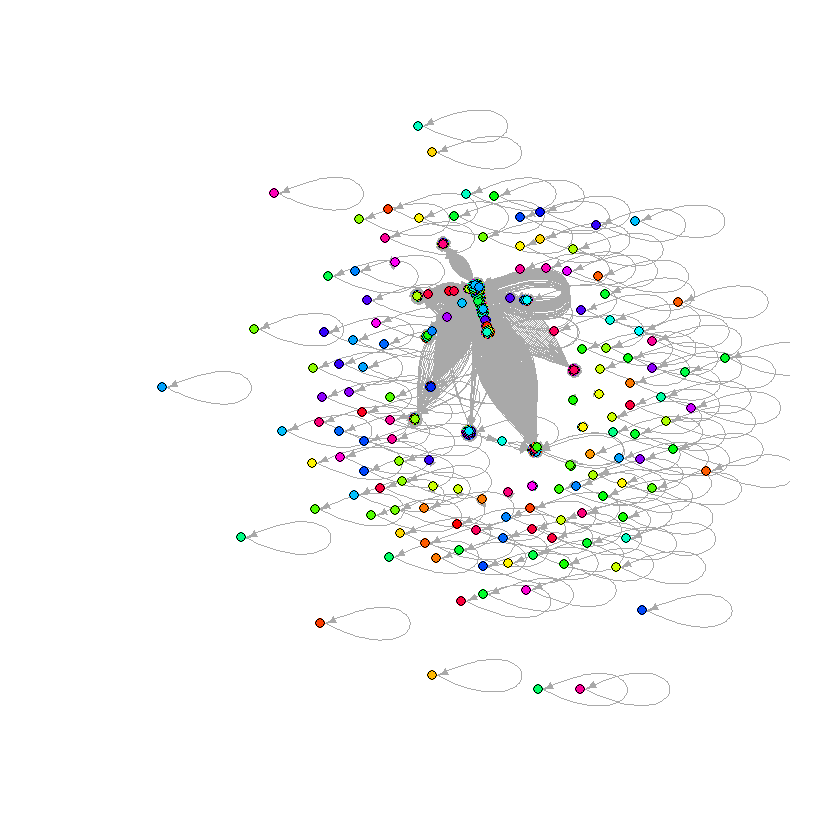

In [37]:
plot(net, edge.arrow.size=.4,vertex.size = 3.5, vertex.color=rainbow(50) , vertex.label=NA)

In [23]:
net_busy <- graph_from_data_frame(MalDat[,2:3], directed=T)
net_quiet <- graph_from_data_frame(MalDat_quiet[,2:3], directed=T)
simplify(net_busy, edge.attr.comb=list(Weight="sum","ignore"))
simplify(net_quiet, edge.attr.comb=list(Weight="sum","ignore"))

IGRAPH cc46a7d DN-- 1634 4418 -- 
+ attr: name (v/c)
+ edges from cc46a7d (vertex names):
 [1] Comp655958->ActiveDirectory     Comp655958->Comp908480         
 [3] Comp655958->Comp370444          Comp655958->Comp004340         
 [5] Comp655958->Comp661433          Comp655958->Comp457448         
 [7] Comp655958->Comp202200          Comp655958->Comp364152         
 [9] Comp655958->None                Comp655958->Comp788417         
[11] Comp655958->Comp056180          Comp655958->Comp303229         
[13] Comp655958->Comp384394          Comp843020->Comp894088         
[15] Comp843020->Comp093748          Comp843020->Comp581624         
+ ... omitted several edges

IGRAPH cc502e0 DN-- 596 1432 -- 
+ attr: name (v/c)
+ edges from cc502e0 (vertex names):
 [1] EnterpriseAppServer->Comp939275      EnterpriseAppServer->Comp894088     
 [3] EnterpriseAppServer->Comp807801      EnterpriseAppServer->Comp581624     
 [5] EnterpriseAppServer->Comp698972      EnterpriseAppServer->Comp332420     
 [7] EnterpriseAppServer->ActiveDirectory EnterpriseAppServer->Comp617405     
 [9] EnterpriseAppServer->Comp661433      EnterpriseAppServer->Comp970123     
[11] EnterpriseAppServer->Comp700191      EnterpriseAppServer->Comp550312     
[13] EnterpriseAppServer->Comp156925      EnterpriseAppServer->Comp395501     
[15] EnterpriseAppServer->Comp425438      EnterpriseAppServer->Comp508178     
+ ... omitted several edges

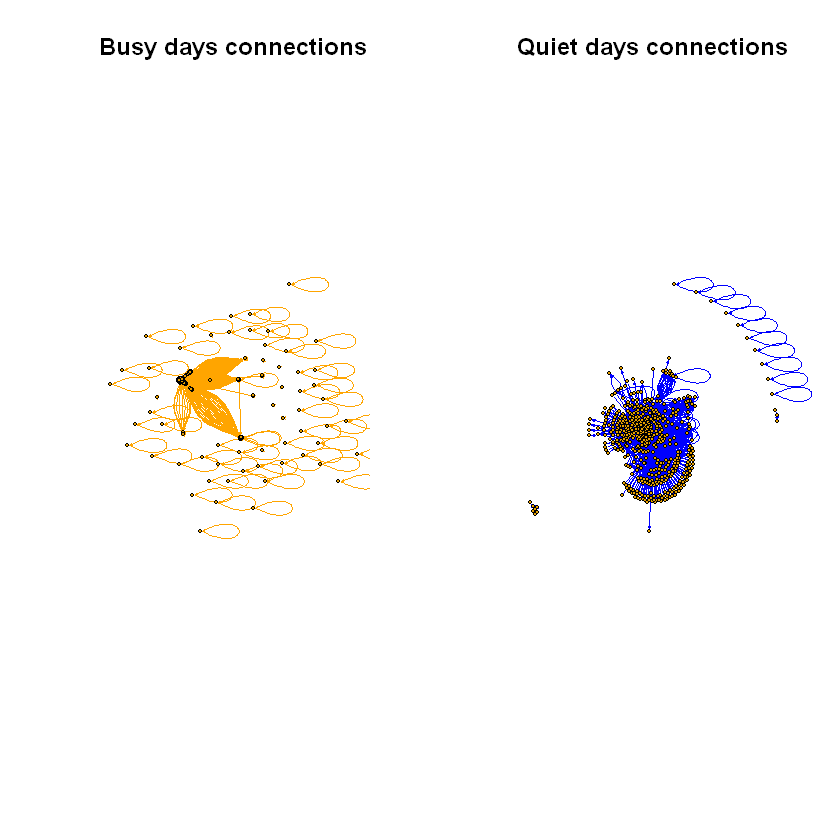

In [49]:
l1 <- layout_with_fr(net_quiet)
l1 <- norm_coords(l1, ymin=-1, ymax=1, xmin=-1, xmax=1)
l2 <- layout_with_fr(net_busy)
l2 <- norm_coords(l2, ymin=-1, ymax=1, xmin=-1, xmax=1)

op <- par(mfrow=c(1,2))
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.arrow.size=0.1,  edge.color="orange", vertex.label=NA, rescale=TRUE, main="Busy days connections")
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.arrow.size=0.1, edge.color="blue", vertex.label=NA, rescale=TRUE, main="Quiet days connections")
par(op)

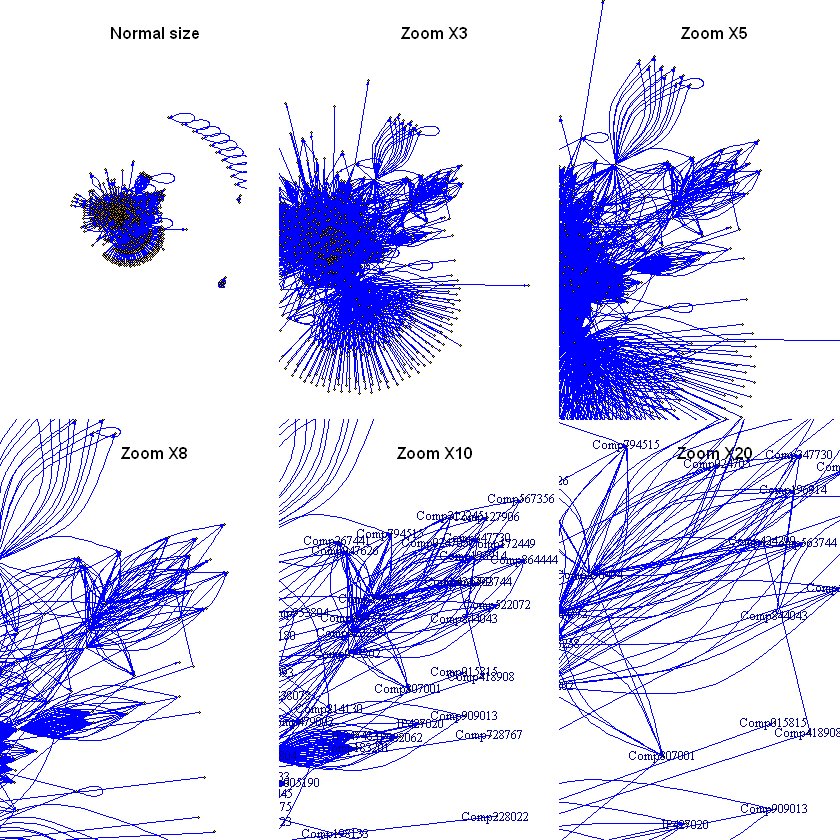

In [52]:
op <- par(mfrow=c(2,3))
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.color="blue", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l1, main="Normal size")
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.color="blue", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l1*3, main="Zoom X3")
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.color="blue", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l1*5, main="Zoom X5")
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.color="blue", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l1*8, main="Zoom X8")
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.color="blue", edge.arrow.size=0.1, rescale=FALSE, layout=l1*10, main="Zoom X10")
plot(net_quiet, vertex.shape="circle", vertex.size=3.5, edge.color="blue", edge.arrow.size=0.1, rescale=FALSE, layout=l1*20, main="Zoom X20")
par(op)

_Do not run the 'Net_Busy' variant below it killed my hopes, laptop and family. I really hope I don't forget to delete this before turning in the project._ 

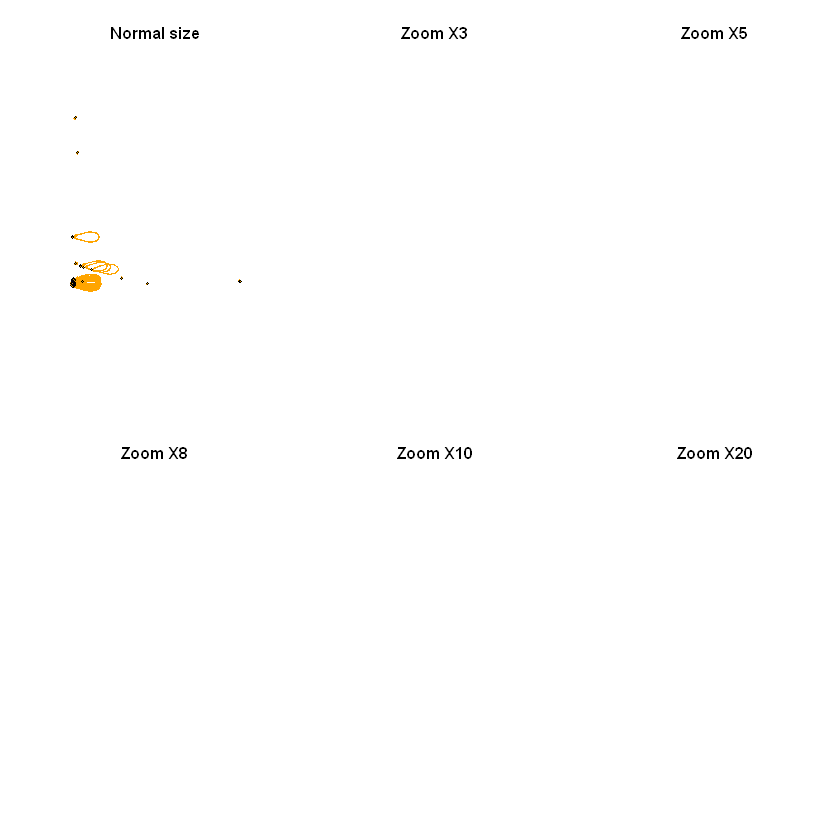

In [53]:
op <- par(mfrow=c(2,3))
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.color="orange", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l2, main="Normal size")
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.color="orange", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l2*3, main="Zoom X3")
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.color="orange", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l2*5, main="Zoom X5")
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.color="orange", edge.arrow.size=0.1, vertex.label=NA, rescale=FALSE, layout=l2*8, main="Zoom X8")
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.color="orange", edge.arrow.size=0.1, rescale=FALSE, layout=l2*10, main="Zoom X10")
plot(net_busy, vertex.shape="circle", vertex.size=3.5, edge.color="orange", edge.arrow.size=0.1, rescale=FALSE, layout=l2*20, main="Zoom X20")
par(op)

In [39]:
s<- sample(1:nrow(Con), size=100, replace=FALSE)
con_sample <- Con[s, ]

In [42]:
dim(con_sample)

[1] 100   2

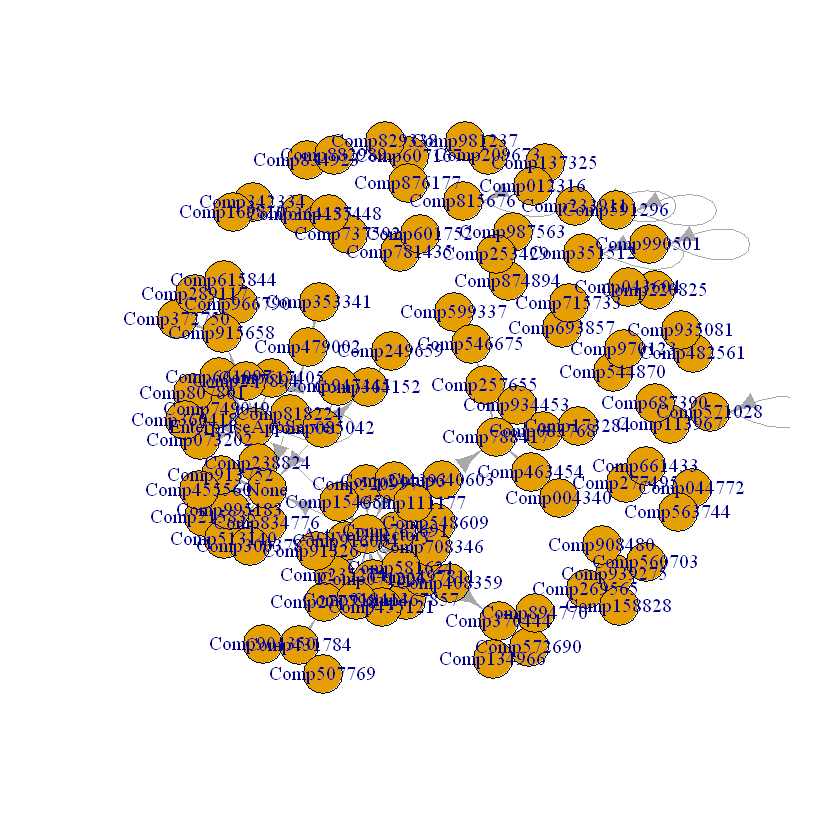

In [43]:
net2<- graph_from_data_frame(con_sample, directed=T)
plot(net2)

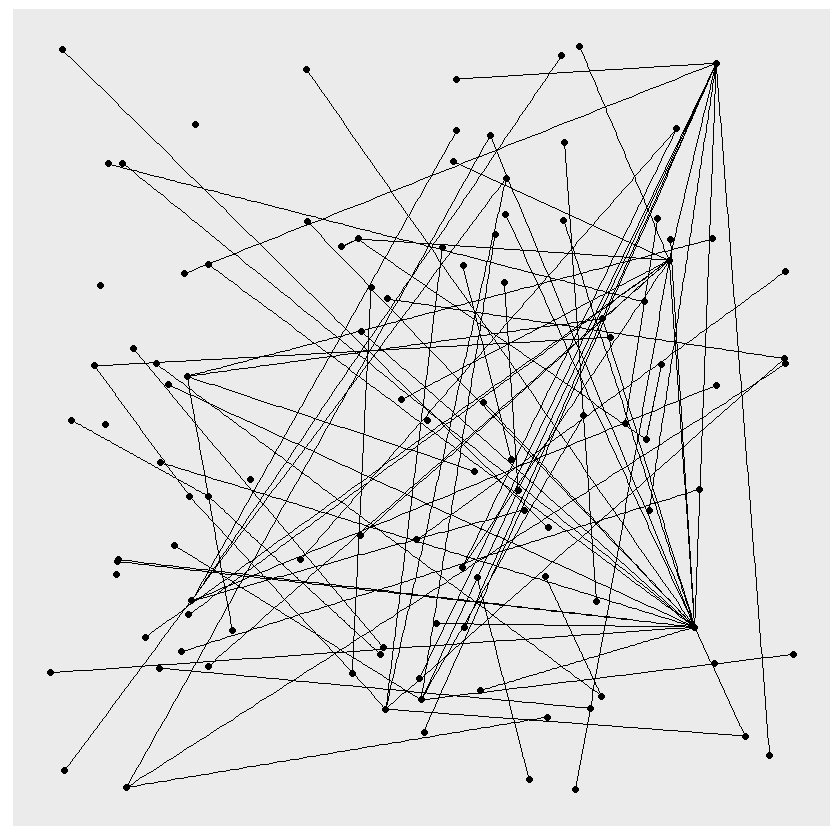

In [46]:
ggraph(net2, layout='lgl') + geom_edge_link()  + geom_node_point()  